![NASA](http://www.nasa.gov/sites/all/themes/custom/nasatwo/images/nasa-logo.svg)

<center>
<h1><font size="+3">GSFC Python Bootcamp</font></h1>
</center>

---

<CENTER>
<H1 style="color:red">
Numpy
</H1>
</CENTER>

In [ ]:
from __future__ import print_function

# <font color='red'> Useful References </font>

<OL>
<LI> <A HREF="http://wiki.scipy.org/Tentative_NumPy_Tutorial">Tentative Numpy Tutorial</A>
<LI> <A HREF="http://docs.scipy.org/doc/numpy/reference">NumPy Reference</A>
<LI> <A HREF="http://mathesaurus.sourceforge.net/matlab-numpy.html">NumPy for MATLAB Users</A>
<LI> <A HREF="http://mathesaurus.sourceforge.net/r-numpy.html">NumPy for R (and S-Plus) Users</A>
<LI> <A HREF="http://people.duke.edu/~ccc14/pcfb/numerics.html">NumPy and Matplotlib (Practical Cumputing for Biologists)</A>
</OL>

#### In case you prefer a video:

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo("3Fp1zn5ao2M")

## <font color='red'> What is Numpy?</font>

<UL>
<LI> Efficient array computing in Python.
<LI> Allows the creation of arrays.
<LI> Allows efficient indexing/slicing of arrays
<LI> Provides mathematical functions that operate on an entire array.
<LI> The critical thing to know is that Python <B> for </B> loops are very slow!
     One should try to use array-operations as much as possible.
</UL>

### <font color='red'> Making Numpy Arrays</font>

First we want to import the appropriate modules into our name space (note this is done automatically with the "--pylab" flag.

In [ ]:
import numpy as np

<UL>
<LI> The primary building block of the numpy module is the class "ndarray". 
<LI> A ndarray object represents a multidimensional, homogeneous array of fixed-sized items. 
<LI> An associated date-type object describes the format of each element in the array. 
<LI> An ndarray object is (almost) never instantiated directly, but instead using a method that returns an instance of the class.
</UL>

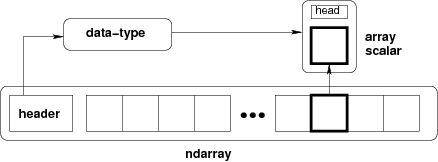

In [1]:
from IPython.core.display import Image 
Image(filename='npArray.png') 

##### Array vs. List

In [ ]:
myList = [1, 2, 3, 5]
arr = np.array([1, 2, 3, 5])
print(arr)
print(myList)

Elements of a one-dimensional array are accessed with the same syntax as a list:

In [ ]:
myList[0]

In [ ]:
arr[0]

In [ ]:
arr[2:]

### Excercise 1
How do you access the final element in the arr array?

### <font color='red'> Difference between List and Array </font>

- The first difference to note between lists and arrays is that arrays are homogeneous; <P>
i.e. all elements of an array must be of the same type. <P>
- In contrast, lists can contain elements of arbitrary type. <P>
For example, we can change the last element in our list above to be a string:

In [ ]:
myList[-1] ='adding a string'
myList

But the same can not be done with an array, as we get an error message:

In [ ]:
arr[-1] ='adding a string'

###  <font color='red'>Array memory representation</font>

The information about the type of an array is contained in its dtype attribute:

In [ ]:
x = np.array([[1, 2], [3, 4]], dtype=np.uint8)
print(x)

In [ ]:
arr = np.array([10, 20, 123123])
arr.dtype

Once an array has been created, its dtype is fixed and it can only store elements of the same type. <P>
For this example where the dtype is integer, if we store a floating point number it will be automatically converted into an integer:

In [ ]:
arr[-1] = 1.234
arr

Why is a homogeneous data type required for arrays? Speed

In [ ]:
x = range(50000)
y = np.arange(50000)

%timeit -n 100 [e**2  for e in x]
%timeit -n 100 y**2

### <font color='red'>Array Creation</font>

Above we created an array from an existing list; <P>
now let us now see other ways in which we can create arrays, which we'll illustrate next. <P>
A common need is to have an array initialized with a constant value, <P>
and very often this value is 0 or 1 (suitable as starting value for additive and multiplicative loops respectively); <P>
zeros creates arrays of all zeros, with any desired dtype:

In [ ]:
b = np.ones((3,2))
print(b)
print(b.shape)

In [ ]:
c = np.zeros((1,3), int)
print(c)
print(type(c))
print(c.dtype)

In [ ]:
d = np.zeros(3, complex)
print(d)
print(d.dtype)
id = np.eye(5)
print(id)

Then there are the linspace and logspace functions to create linearly and logarithmically-spaced grids, respectively, with a fixed number of points and including both ends of the specified interval.<P>

linspace(a, b, n) generates n uniformly spaced coordinates, starting with a and ending with b

In [ ]:
x = np.linspace(-5, 5, 11) # start, stop, num
print(x)

In [ ]:
a = np.r_[-5:5:11j]        # same as linspace(-1, 1, 11)
print(a)

In [ ]:
x = np.arange(-5, 5, 1, float)   # upper limit 5 is not included!!
print (x)

## Exercise 2
Create a new array of 11 elements logarithmically spaced from 1 to 100.

### <font color='red'>Indexing with other arrays</font>

Above we saw how to index arrays with single numbers and slices, just like Python lists. 
But arrays allow for a more sophisticated kind of indexing which is very powerful: 
you can index an array with another array, and in particular with an array of boolean values. 
This is particluarly useful to extract information from an array that matches a certain condition.
<P>
Consider for example that in the array uni we want to replace all values above 0 with the value 10. We can do so by first finding the mask that indicates where this condition is true or false:


In [ ]:
# <-- seed value, do not have to specify, but useful for reproducibility
rng = np.random.RandomState(0)  

In [ ]:
rng.normal(loc=0, scale=1, size=5)

In [ ]:
# 5 random numbers, picked from a uniform distribution between -10 and 10
uni = rng.uniform(-10, 10, size=5)  
print(uni)

In [ ]:
mask = uni > 0
mask

Now that we have this mask, we can use it to either read those values or to reset them to 0:

In [ ]:
print('Array:', uni)
print('Masked array:', uni[mask])

In [ ]:
uni[mask] = 10
print(uni)

### <font color='red'>Changing Array Dimension</font>

In [ ]:
a = np.array([0, 1.2, 4, -9.1, 5, 8])
print("Initial shape: ", a.shape)
a.shape = (2,3) # turn a into a 2x3 matrix
print(a.size)
print("First shape change: ", a.shape)
a.shape = (a.size,) # turn a into a vector of length 6 again
print("Second shape change: ", a.shape)
a = a.reshape(2,3) # same effect as setting a.shape
print("Third shape change: ", a.shape)

### <font color='red'>Array Initialization from a Python Function</font>

In [ ]:
def myfunc(i, j):
    return (i+1)*(j+4-i)

# make 3x6 array where a[i,j] = myfunc(i,j):
a = np.fromfunction(myfunc, (3,6))
print(a)

### <font color='red'>Array Indexing</font>

In [ ]:
a = np.linspace(-1, 1, 6)
a[2:4] = -1        # set a[2] and a[3] equal to -1
a[-1]  = a[0]      # set last element equal to first one
a[:]   = 0         # set all elements of a equal to 0
a.fill(0)          # set all elements of a equal to 0

i = 1
j = 2
k = 2
a.shape = (2,3)    # turn a into a 2x3 matrix
print(a[0,1])      # print element (0,1)
a[i,j] = 10        # assignment to element (i,j)
a[i][j] = 10       # equivalent syntax (slower)
print(a[:,k])      # print column with index k
print(a[1,:])      # print second row
a[:,:] = 0         # set all elements of a equal to 0

In [ ]:
a = np.linspace(0, 29, 30)
a.shape = (5,6)
print(a)

In [ ]:
print(a[1:3,:-1:2])   # a[i,j] for i=1,2 and j=0,2,4

In [ ]:
print(a[::3,2:-1:2])   # a[i,j] for i=0,3 and j=2,4

### <font color='red'>Array Slicing</font>

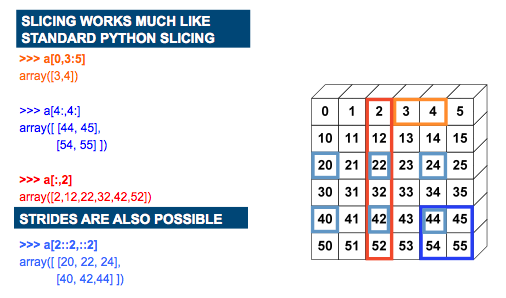

In [2]:
from IPython.core.display import Image 
Image(filename='ArraySlicing.png') 

Slices Refer the Array Data
<UL>
<LI> With a as list, a[:] makes a copy of the data	
<LI> With a as array, a[:] is a reference to the data
</UL>

In [ ]:
print(a)
b = a[1,:]      # extract 2nd column of a
print(a[1,1])
b[1] = 2
print(a[1,1])

In [ ]:
# Take a copy to avoid referencing via slices:
b = a[1,:].copy()
print(a[1,1])
b[1] = 7777     # b and a are two different arrays now
print(a[1,1])

### <font color='red'>Array Computations</font>

In [ ]:
b = 3*a - 1    # a is array, b becomes array

The above operation generates a temporary array:
<OL>
<LI> tb = 3*a
<LI> b = tb - 1
</OL>
As far as possible, we want to avoid the creation
  of temporary arrays to limit the memory usage and
  to decrease the computational time associated with
  with array computations.

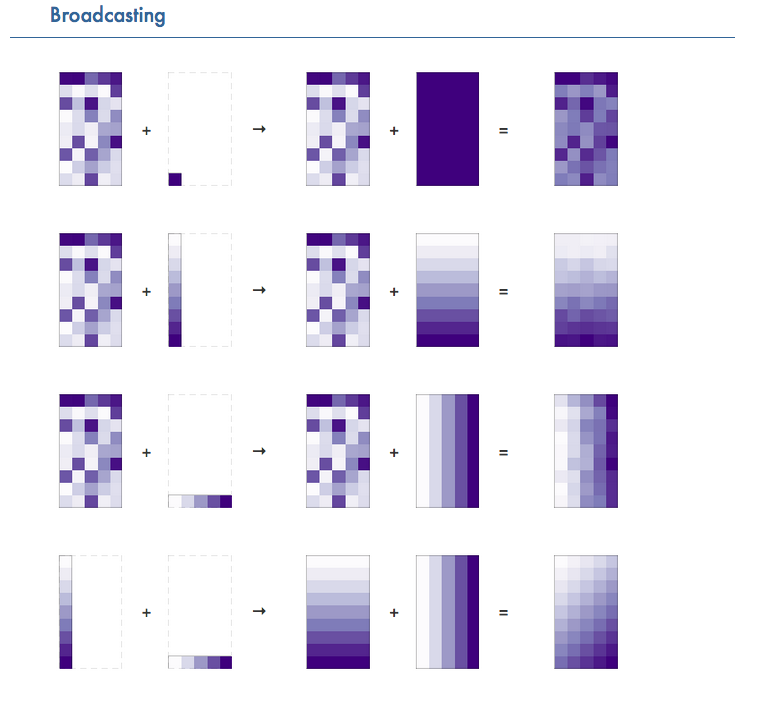

In [3]:
from IPython.core.display import Image 
Image(filename='Broadcasting.png') 

### <font color='red'>In-Place Array Arithmetics</font>

In [ ]:
b = a
b *= 3  # or multiply(b, 3, b)
b -= 1  # or subtract(b, 1, b)

### <font color='red'>Math Functions and Array Arguments</font>

### <font color='red'>NumPy Matrices</font>

In [ ]:
x1 = np.array([1, 2, 3], float)
x2 = np.matrix(x)               # or just mat(x)
print(x2)                       # row vector

In [ ]:
x3 = np.matrix(x).transpose()          # column vector
print(x3)
type(x3)

In [ ]:
A = np.eye(10)                    # identity matrix
print(A)
B = np.mat(A)                    # turn array to matrix
print(B)
y2 = x2*B                     # vector-matrix product
print(y2)
y3 = B*x3                     # matrix-vector product
print(y3)

In [ ]:
a = np.array([[1,2],[3,4]])
print("a = ", a)
m = np.mat(a)
print("m = ", m)
print("a[0] = ", a[0])
print("m[0] = ", m[0])
print("a*a  = ", a*a)
print("m*m  = ", m*m)
print("dot  = ", np.dot(a, a))

### <font color='red'> Universal Functions and Loops</font>

In [ ]:
def mult1(a,b):
    return a * b

def mult2(a,b):
    c = np.empty(a.shape)
    for i in range(a.shape[0]):
        for j in range(a.shape[1]):
            c[i,j] = a[i,j] * b[i,j]
    return c

In [ ]:
a = np.random.random((800,800))
b = np.random.random((800,800))

In [ ]:
timeit -n 100 mult1(a,b)

In [ ]:
timeit -n 100 mult2(a,b)

# <font color='red'>Reading and writing arrays to disk </font>

Numpy lets you read and write arrays into files in a number of ways. In order to use these tools well, it is critical to understand the difference between a text and a binary file containing numerical data. 
In a text file, the number
&pi;
could be written as "3.141592653589793", for example: a string of digits that a human can read, with in this case 15 decimal digits. In contrast, that same number written to a binary file would be encoded as 8 characters (bytes) that are not readable by a human but which contain the exact same data that the variable pi had in the computer's memory. <P>

The tradeoffs between the two modes are thus:
<UL>
<LI> <B>Text mode</B>: occupies more space, precision can be lost (if not all digits are written to disk), but is readable and editable by hand with a text editor. Can only be used for one- and two-dimensional arrays.
<LI> <B>Binary mode</B>: compact and exact representation of the data in memory, can't be read or edited by hand. Arrays of any size and dimensionality can be saved and read without loss of information.
</UL>

First, let's see how to read and write arrays in text mode. The np.savetxt function saves an array to a text file, with options to control the precision, separators and even adding a header:

In [ ]:
arr = np.arange(10).reshape(2, 5)
print(arr)                           
np.savetxt('test.out', arr)

In [ ]:
!cat test.out

And this same type of file can then be read with the matching np.loadtxt function:

In [ ]:
arr2 = np.loadtxt('test.out')
print(arr2)

You can also use the function np.genfromtxt that deals with missing values

In [ ]:
arr3 = np.genfromtxt('test.out', missing_values='0.000000000000000000e+00', usemask=True)
print(arr3)

For binary data, Numpy provides the np.save and np.savez routines. 
The first saves a single array to a file with .npy extension, 
while the latter can be used to save a group of arrays into a single file with .npz extension. 
The files created with these routines can then be read with the np.load function.
<P>
Let us first see how to use the simpler np.save function to save a single array:


In [ ]:
np.save('test.npy', arr)
# Now we read this back
arr_loaded = np.load('test.npy')

print(arr)
print(arr_loaded)

print(arr_loaded.dtype)

# Let's see if any element is non-zero in the difference.
# A value of True would be a problem.
print ('Any differences?', np.any(arr - arr_loaded))

Now let us see how the np.savez_compressed function works.

In [ ]:
np.savez_compressed('test.npz', first=arr, second=arr2)
arrays = np.load('test.npz')
arrays.files

The object returned by np.load from an .npz file works like a dictionary:

In [ ]:
a=arrays['first']
b=arrays['second']
print('a = ', a)
print('b = ', b)

This .npz format is a very convenient way to package compactly and without loss of information, into a single file, a group of related arrays that pertain to a specific problem. At some point, however, the complexity of your dataset may be such that the optimal approach is to use one of the standard formats in scientific data processing that have been designed to handle complex datasets, such as NetCDF or HDF5.